# Setup

## Imports

In [135]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [108]:
tf.__version__, pd.__version__

('2.18.0', '2.2.2')

In [109]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Dataset base

In [110]:
dataset = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = dataset

In [111]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [112]:
print(f"x_train values: {x_train[0][0][0]}")
print(f"y_train values: {y_train[0]}")

x_train values: [59 62 63]
y_train values: [6]


## Dataset format

In [113]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [114]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [115]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


In [116]:
print(f"x_train values: {x_train[0][0][0]}")
print(f"y_train values: {y_train[0]}")

x_train values: [0.23137255 0.24313726 0.24705882]
y_train values: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Construct model

In [123]:
net = Sequential()
net.add(Input(shape=(32, 32, 3)))
net.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
net.add(BatchNormalization())
net.add(MaxPooling2D((2, 2)))
net.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
net.add(BatchNormalization())
net.add(MaxPooling2D((2, 2)))
net.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
net.add(BatchNormalization())
net.add(MaxPooling2D((2, 2)))
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(0.5))
net.add(Dense(10, activation='softmax'))
net.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [146]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)
]

net.compile(
  optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

history = net.fit(
  datagen.flow(x_train, y_train, batch_size=64),
  epochs=100,
  validation_data=(x_test, y_test),  
  callbacks=callbacks,
  batch_size=64,
  shuffle=True,
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6924 - loss: 0.9268 - val_accuracy: 0.7617 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7049 - loss: 0.8645 - val_accuracy: 0.6877 - val_loss: 0.9405 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7212 - loss: 0.8115 - val_accuracy: 0.7177 - val_loss: 0.8870 - learning_rate: 0.0010
Epoch 4/100
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7327 - loss: 0.7831
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7327 - loss: 0.7831 - val_accuracy: 0.7431 - val_loss: 0.7826 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7542 - loss: 0.7151 - val_accuracy: 0.7843 - val_loss: 0.6560 - learning_rate: 5.0000e-04
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7617 - loss:

Test loss: 0.5857904553413391
Test accuracy: 0.8044999837875366


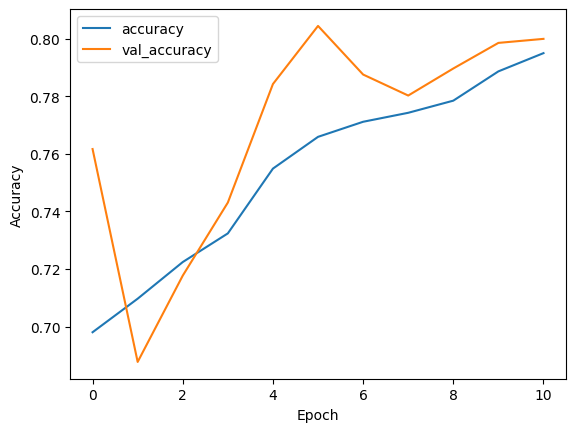

In [147]:
model = net.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {model[0]}")
print(f"Test accuracy: {model[1]}")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Show predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


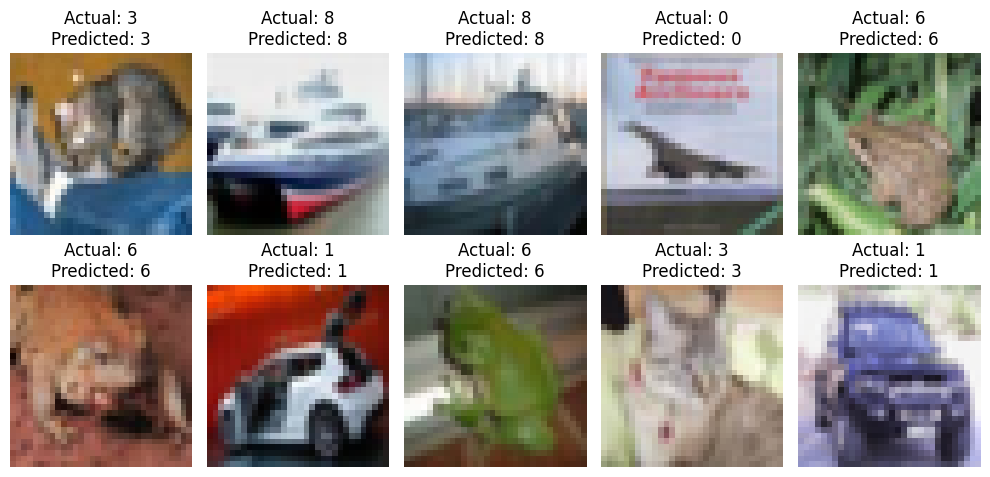

In [ ]:
predictions = net.predict(x_test)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    (actual, predicted) = (y_test[i].argmax(), predictions[i].argmax())
    ax.imshow(x_test[i])
    ax.set_title(f"Actual: {actual}\nPredicted: {predicted}")
    ax.axis('off')
plt.tight_layout()
plt.show()


# Save model

In [ ]:
net.save('../app/models/cifar10_model.keras')